# 21M.387 Fundamentals of Music Processing
## Lab7

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
import fmp

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

## Exercise 1

- Find a song - ideally a short one: 2-3 minutes in length
- Using Audacity, save it as a 22050Hz, mono wave file.
- Using Sonic Visualizer, add markers to the song at the locations that you consider to be section boundaries:
  - Open the wave file.
  - Play it.
  - Each time you get to a section boundary, hit `;`.
  - After you are done, you can edit the markers to adjust them a bit.
  - Save the session
  - Export Annotation Layer and save it as a txt file.

## Exercise 2

- Load the annotations into python using `load_annotiations(filename)`. You can call this list `ref` for reference annotation.
- Load the song file as well into the variable `snd`

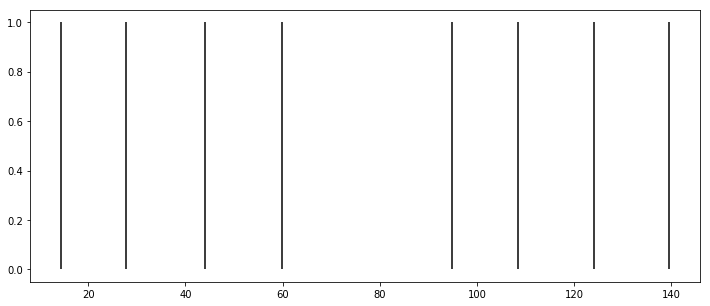

In [10]:
snd = load_wav("audio/brahms_hungarian_dance_5a.wav")
ref = fmp.load_boundary_annotations("audio/brahms_hungarian_dance_5a.lab")
plt.vlines(ref,0,1)

## Exercise 3

Create the function: `audio_to_ssm(snd, cens_filt_len, cens_ds)` that does this:
- Create a regular chromagram using `fmp.make_chromagram` from `snd`, no normalization, no log compression. Use parameters:
  - $N = 4096$
  - $H = 2048$
- Use CENS (`fmp.cens`) to create a CENS chromagram with input parameters `cens_filt_len` and `cens_ds`
- Create the SSM from this chromagram
- Return both the SSM and the feature rate of the the chromagram

- Call the this function for the song you just loaded. Pick some value for `cens_filt_len` and `cens_ds` that seem reasonable.    
- Print the feature rate.  
- Plot the SSM.  

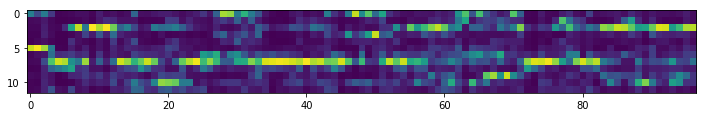

In [24]:
fs = 22050 

def audio_to_ssm(snd, cens_filt_len, cens_ds):
    fft_len = 4096
    hop_size = fft_len / 2
    chroma = fmp.make_chromagram(snd, fs, fft_len, hop_size, 0)
    plt.figure()
    plt.imshow(chroma)
    chroma = fmp.cens(chroma, cens_filt_len, cens_ds)
    return chroma

cens_filt_len = 25
cens_ds = 3
a = audio_to_ssm(snd[:200000], cens_filt_len, cens_ds)



## Exercise 4

Create the novelty function using the "sliding checkboard" technique.
- The function that does this is `fmp.diagonal_novelty(ssm, cb_hlen)`
- For `cb_len`, which is the half-length of the checkerboard, pick a numeric value that is roughly 10 seconds.
- Find the peaks of the novelty curve using `fmp.find_peaks2(x, win_len, thresh)`. These are the estimates of the boundary locations.
- Plot the novelty function and the locations of the estimates.


## Exercise 5

- Convert the reference annotations (which are seconds) to the feature rate of the novelty curve.
- Recreate the plot above (novelty and boundary estimates), and add an additional plot for the reference annotations using `plt.vlines()`.
- Use the function `fmp.calc_prf(est, ref, tau)` to calculate the Precision, Recall, and F-measure numbers. Use a `tau` of 3 seconds. But remember that `tau` must be in the same units as what you pass in for `est` and `ref`.
- What values do you get? 

## Exercise 6

Try adjusting some of the parameters above and see if you can improve your F-measure.
Those parameters are:
- `cens_filt_len` and `cens_ds`
- `cb_hlen`
- `win_len` and `thresh` for `find_peaks2`



## Exercise 7

Now we'll try using the Lag Matrix technique for calculating boundary estimates.
- Call `audio_to_ssm` to create the SSM and feature rate.
- Threshold and scale the `ssm` with `fmp.thresh_and_scale(ssm, thresh)`
- Plot this thresholded SSM
- Convert this SSM to a lag matrix with `fmp.make_lag_matrix(ssm)`
- Plot the lag matrix

## Exercise 8

- Create a novelty curve from the lag matrix using `fmp.column_novelty(lag_mtx, k_hlen)`
- Pick peaks to create bounday estimates
- Repeat the above steps to plot (on a single figure):
  - Novelty curve
  - Boundary estimates
  - Reference annotations
- Finally, calculate the Precision, Recall, and F-measure and print  

## Exercise 9

See if you can improve your F-measure by tweaking some of the parameters:
- `cens_filt_len` and `cens_ds`
- ssm thresholding parameter `thresh`
- half-length of column kernel: `k_hlen`
- `win_len` and `thresh` for `find_peaks2`


